In [30]:
# -*- coding: utf-8 -*-
from matplotlib import pyplot as plt
from PIL import Image
from pylab import *
import numpy as np

In [56]:
#读取图片并转为数组
def addImage(image_list, path, count):
    image = []
    im = array(Image.open(clean_path + str(count) + ".bmp"))
    for i in range(40):
        for j in range(50):
            image.append(im[i][j][1])
    image_list.append(image)
    return image_list

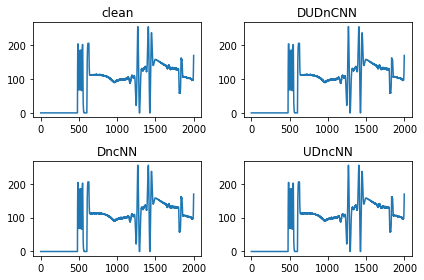

In [69]:
DUDnCNN_path = "C:/Users/bbfss/Desktop/Code/github/Denoising-CNN/dataset/结果集/DUDnCNN结果集/"
DncNN_path = "C:/Users/bbfss/Desktop/Code/github/Denoising-CNN/dataset/结果集/DncNN结果集/"
UDncNN_path = "C:/Users/bbfss/Desktop/Code/github/Denoising-CNN/dataset/结果集/UDncNN结果集/"
clean_path = "C:/Users/bbfss/Desktop/Code/github/Denoising-CNN/dataset/结果集/干净图像结果集/"

count = 1
image_list = []
image_list = addImage(image_list, clean_path, count)
image_list = addImage(image_list, DUDnCNN_path, count)
image_list = addImage(image_list, DncNN_path, count)
image_list = addImage(image_list, UDncNN_path, count)


plt.subplot(2, 2, 1)
plt.title('clean')
plt.plot(image_list[0])

plt.subplot(2, 2, 2)
plt.title('DUDnCNN')
plt.plot(image_list[1])

plt.subplot(2, 2, 3)
plt.title('DncNN')
plt.plot(image_list[2])

plt.subplot(2, 2, 4)
plt.title('UDncNN')
plt.plot(image_list[3])
plt.tight_layout()
